In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv("USA_Housing.csv")
raw_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
raw_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
raw_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
data = raw_data.drop("Address", axis=1)
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
target = data.Price
inputs = data.drop("Price",axis=1)

In [7]:
def scatter_distplot(df, col):
    fig, axes = plt.subplots(1,2,figsize=(15,5))

    dist_plot = sns.distplot(df[col], ax=axes[0])
    dist_plot.set_xlabel(col, fontsize=18)
    
    scatter_plot = sns.scatterplot(x=df[col], y=target, ax=axes[1])
    scatter_plot.set_xlabel(col, fontsize=18)
    scatter_plot.set_ylabel("Price", fontsize=18)



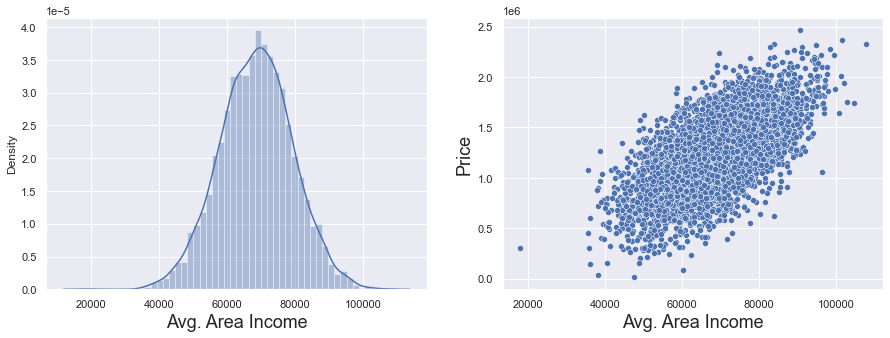

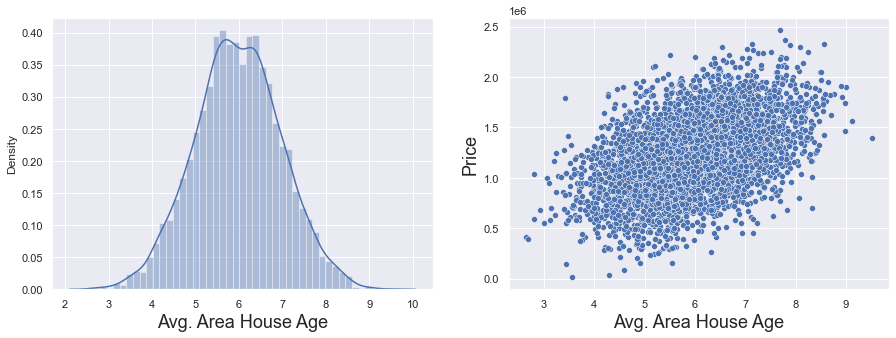

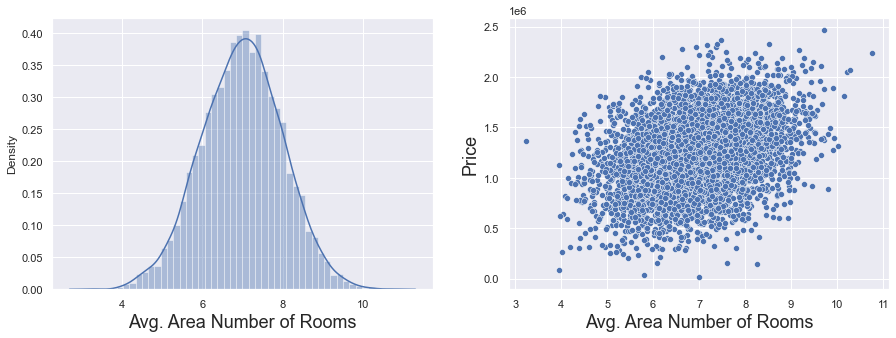

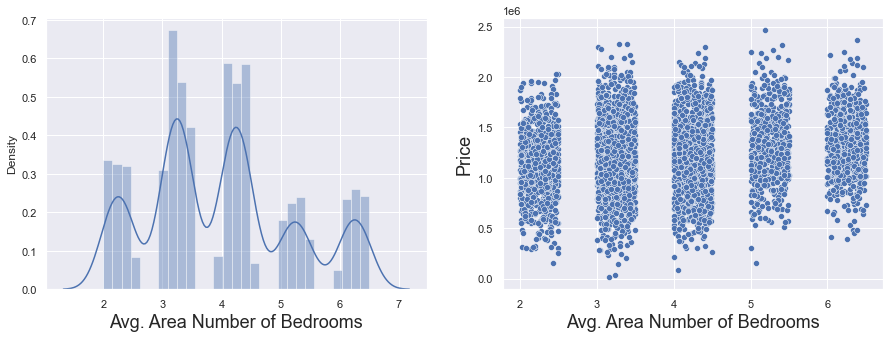

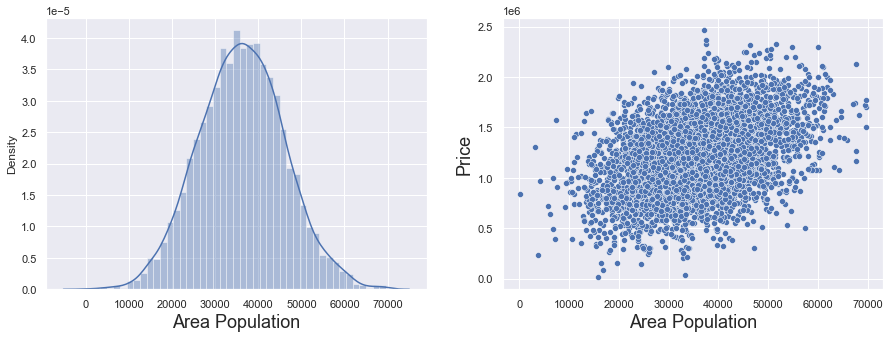

In [8]:
for col in inputs.columns:
    scatter_distplot(inputs, col)

<AxesSubplot:>

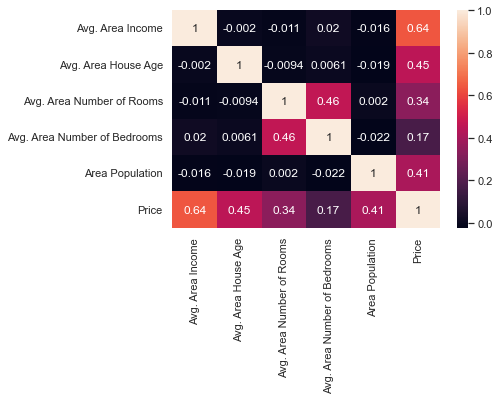

In [9]:
sns.heatmap(data.corr(), annot=True)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = inputs.columns
vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]
vif

,features,VIF
0,Avg. Area Income,29.650899
1,Avg. Area House Age,27.447775
2,Avg. Area Number of Rooms,45.257291
3,Avg. Area Number of Bedrooms,14.537873
4,Area Population,12.825450


### Data that has been standardized 
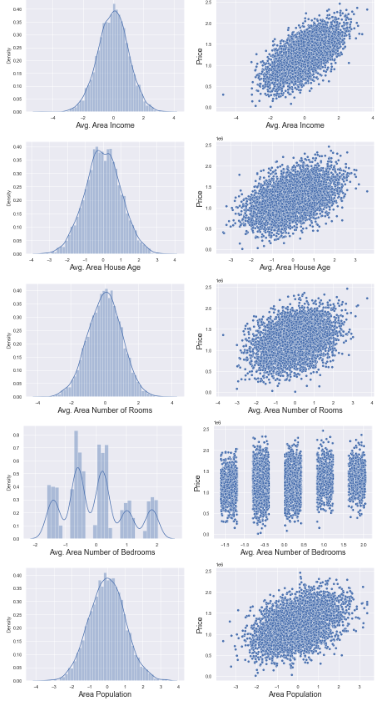

### Split Unscaled Data

In [11]:
from sklearn.model_selection import train_test_split

x_train_no_std, x_test_no_std, y_train_no_std, y_test_no_std = train_test_split(inputs, target, random_state=365, test_size=0.2)

### Build Model for Unscaled Data

In [12]:
reg_no_std = LinearRegression()
reg_no_std.fit(x_train_no_std, y_train_no_std) 

LinearRegression()

In [13]:
y_hat_no_std = reg_no_std.predict(x_train_no_std)

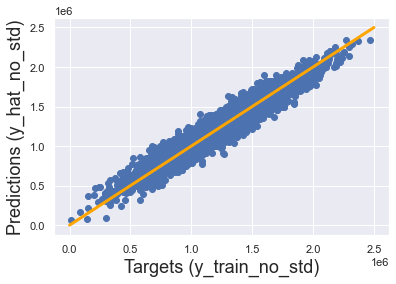

In [14]:
plt.scatter(y_train_no_std, y_hat_no_std)
plt.xlabel("Targets (y_train_no_std)", fontsize=18)
plt.ylabel("Predictions (y_hat_no_std)", fontsize=18)

x = np.linspace(0,2.5e6)
y = x
plt.plot(x,y,c="orange",lw=3)

In [15]:
r_score_train_no_std = reg_no_std.score(x_train_no_std, y_train_no_std)
r_score_train_no_std

0.9181859079129733

In [16]:
y_hat_test_no_std = reg_no_std.predict(x_test_no_std)

In [17]:
summary_table_no_std = pd.DataFrame(columns=["coefficient"], data=reg_no_std.coef_)
summary_table_no_std["features"] = inputs.columns
summary_table_no_std


,coefficient,features
0,21.614312,Avg. Area Income
1,166242.121249,Avg. Area House Age
2,119446.083411,Avg. Area Number of Rooms
3,2206.646418,Avg. Area Number of Bedrooms
4,15.270291,Area Population


### Performance of Unscaled Data Testing

Text(0, 0.5, 'Predictions (y_hat_test_no_std)')

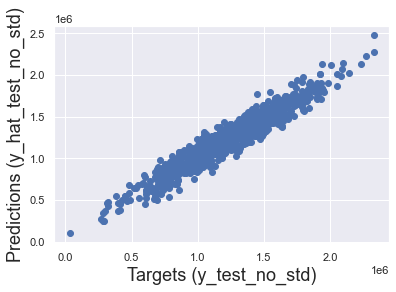

In [18]:
plt.scatter(x=y_test_no_std, y=y_hat_test_no_std)
plt.xlabel("Targets (y_test_no_std)", fontsize=18)
plt.ylabel("Predictions (y_hat_test_no_std)", fontsize=18)

Text(0.5, 1.0, 'Residual - Test - No Std')

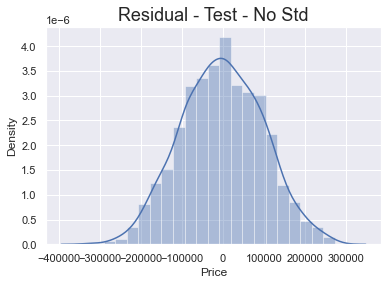

In [19]:
sns.distplot(y_test_no_std - y_hat_test_no_std)
plt.title("Residual - Test - No Std", fontsize=18)

In [20]:
print(f"Overall:\n{(y_test_no_std - y_hat_test_no_std).describe()}\n")
print(f"Skewness: {round((y_test_no_std - y_hat_test_no_std).skew(),2)}")
print(f"Mean: {round((y_test_no_std - y_hat_test_no_std).mean(),2)}")
print(f"Median: {round((y_test_no_std - y_hat_test_no_std).median(),2)}")

Overall:
count      1000.000000
mean      -1509.359987
std       99279.941321
min     -318855.632591
25%      -73293.466123
50%         -64.842674
75%       69749.509331
max      273870.406074
Name: Price, dtype: float64

Skewness: 0.01
Mean: -1509.36
Median: -64.84


In [21]:
r_score_test_no_std = reg_no_std.score(x_test_no_std, y_test_no_std)
r_score_test_no_std

0.9172058023346339

In [22]:
r_square_no_std_summary = pd.Series(data=round(r_score_train_no_std,5), index=["r_score_train_no_std"])
r_square_no_std_summary["r_score_test_no_std"] = round(r_score_test_no_std,5)
r_square_no_std_summary.to_frame()

,0
r_score_train_no_std,0.91819
r_score_test_no_std,0.91721


### Split Scaled Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [24]:
inputs_scaled = scaler.transform(inputs)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [26]:
inputs_df = pd.DataFrame(data=inputs_scaled, columns=inputs.columns)
inputs_df["Price"] = target.values
inputs_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,1.059034e+06
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,1.505891e+06
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,1.058988e+06
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,1.260617e+06
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,6.309435e+05
...,...,...,...,...,...,...
4995,-0.752109,1.869297,-0.845588,-0.422467,-1.342732,1.060194e+06
4996,0.929740,1.030822,-0.408686,0.031337,-1.062747,1.482618e+06
4997,-0.487235,1.284470,-2.170269,-1.500251,-0.291937,1.030730e+06
4998,-0.054592,-0.446694,0.141541,1.182053,0.651116,1.198657e+06


<AxesSubplot:>

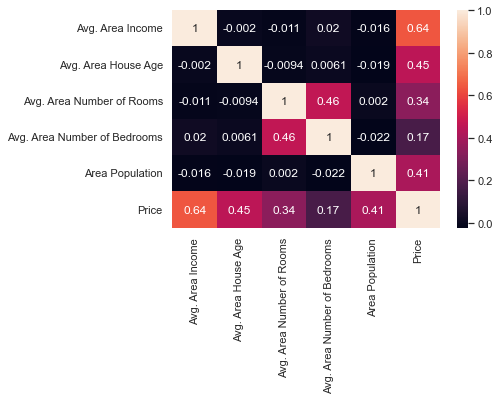

In [27]:
sns.heatmap(inputs_df.corr(), annot=True)

### Build Model for Scaled Data

In [28]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [29]:
y_hat = reg.predict(x_train)

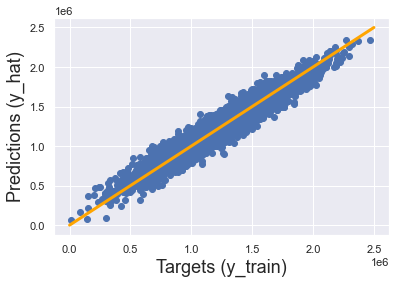

In [30]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", fontsize=18)
plt.ylabel("Predictions (y_hat)", fontsize=18)

x = np.linspace(0,2.5e6)
y = x
plt.plot(x,y,c="orange",lw=3)

In [31]:
reg.intercept_

1232374.526139742

In [32]:
reg_summary = pd.DataFrame(columns=["weights"], data=reg.coef_)
reg_summary["features"] = inputs.columns
reg_summary

,weights,features
0,230342.105520,Avg. Area Income
1,164805.295458,Avg. Area House Age
2,120130.825156,Avg. Area Number of Rooms
3,2723.032232,Avg. Area Number of Bedrooms
4,151552.410072,Area Population


count    4.000000e+03
mean    -5.312904e-11
std      1.015767e+05
min     -3.370071e+05
25%     -6.991187e+04
50%     -1.058613e+02
75%      6.895613e+04
max      3.624884e+05
Name: Price, dtype: float64

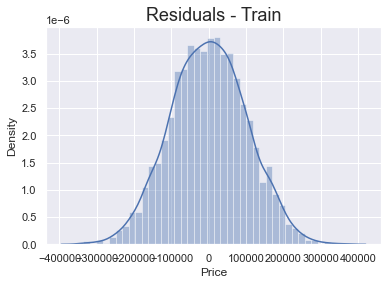

In [33]:
residuals_train = y_train - y_hat
sns.distplot(residuals_train)
plt.title("Residuals - Train", fontsize=18)
residuals_train.describe()

In [34]:
r_score_train = reg.score(x_train, y_train)

### Performance of Scaled Data - Testing

In [35]:
y_hat_test = reg.predict(x_test)

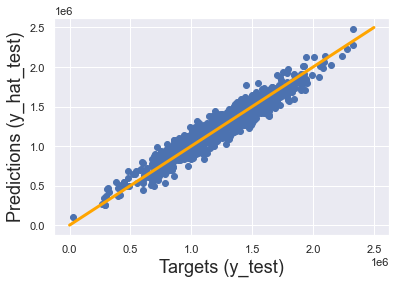

In [36]:
plt.scatter(y_test, y_hat_test)
plt.xlabel("Targets (y_test)", fontsize=18)
plt.ylabel("Predictions (y_hat_test)", fontsize=18)

x = np.linspace(0,2.5e6)
y = x
plt.plot(x,y,c="orange",lw=3)

Text(0.5, 1.0, 'Residuals - Test')

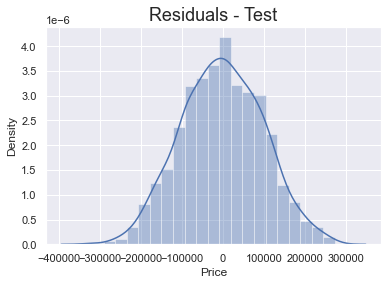

In [37]:
sns.distplot(y_test - y_hat_test)
plt.title("Residuals - Test", fontsize=18)

In [38]:
print(f"Overall:\n{(y_test - y_hat_test).describe()}\n")
print(f"Skewness: {round((y_test - y_hat_test).skew(),2)}")
print(f"Mean: {round((y_test - y_hat_test).mean(),2)}")
print(f"Median: {round((y_test - y_hat_test).median(),2)}")

Overall:
count      1000.000000
mean      -1509.359987
std       99279.941322
min     -318855.632592
25%      -73293.466123
50%         -64.842674
75%       69749.509331
max      273870.406074
Name: Price, dtype: float64

Skewness: 0.01
Mean: -1509.36
Median: -64.84


In [39]:
r_score_test = reg.score(x_test, y_test)

### Unscaled vs Scaled (R_Squared)

In [40]:
r_score_summary = pd.DataFrame(columns = ["train", "test"], index=["std", "no_std"], data = np.array([[r_score_train, r_score_test], [r_score_train_no_std, r_score_test_no_std]]))
r_score_summary

,train,test
std,0.918186,0.917206
no_std,0.918186,0.917206


### Unscaled vs Scaled (Coefficient) 

In [41]:
pd.concat([summary_table_no_std, reg_summary], axis=1)

,coefficient,features,weights,features
0,21.614312,Avg. Area Income,230342.105520,Avg. Area Income
1,166242.121249,Avg. Area House Age,164805.295458,Avg. Area House Age
2,119446.083411,Avg. Area Number of Rooms,120130.825156,Avg. Area Number of Rooms
3,2206.646418,Avg. Area Number of Bedrooms,2723.032232,Avg. Area Number of Bedrooms
4,15.270291,Area Population,151552.410072,Area Population


### Conclusion

- Two similar model test performance indicates that standardization have ***nothing to do with improving our model prediction ability***. 
- From the distribution of each of the standardized predictors, we can see the ***standardized normal distribution (mean = 0, stdev = 1) of each feature***. 
- ***No effect*** on the shape of relationship scatter plots ***between predictors and the target*** 
- The only ***difference*** here is the ***coefficient*** between scaled and unscaled data. When we scaled it, the ```coefficient``` becomes ```weight``` and it shows how significantly each predictors affect the target. 
- ***Ranking*** from the first to the bottom of ***level of effect power***: ```Avg. Area Incomee```, ```Avg. Area House Age```, ```Area Population```, ```Avg. Area Number of Roooms```, ```Avg. Area Number of Bedrooms```. We can also see the ***same pattern on the heatmap of correlation between variables***
- However the coefficient helps us understand that ***how many units of price change if we increase/decrease 1 unit of a feature***.